In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math as math

N = 100
x = np.random.uniform(low=-1, high=1, size=N)

In [3]:
a, b, c, d = np.random.uniform(low=-3, high=3, size=4)
xx = np.linspace(-1, 1, 1000)
f_polinom = a * xx**3 + b * xx**2 + c * xx + d

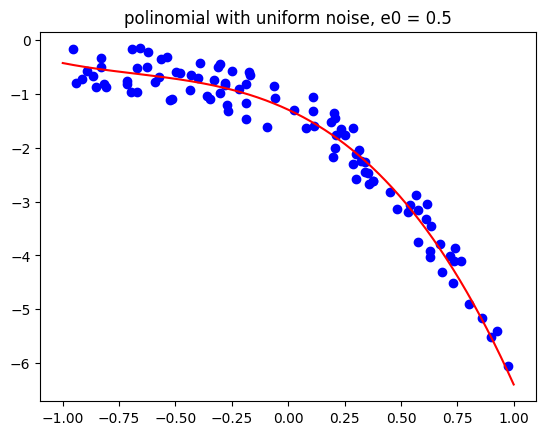

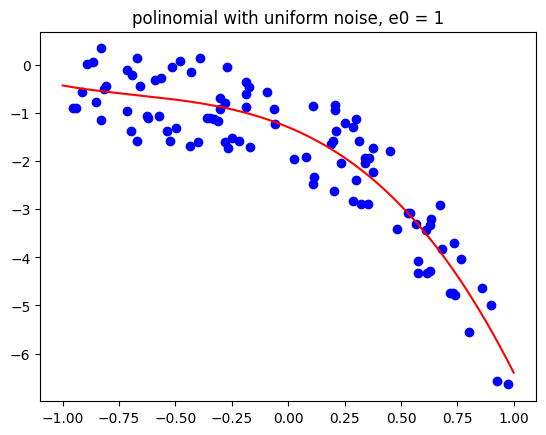

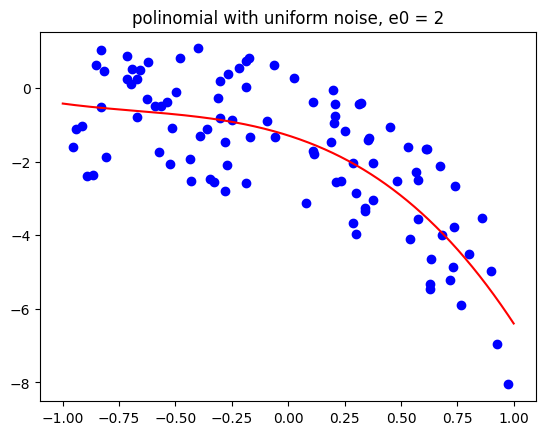

In [4]:
def draw_polinomial_uniform_noise(e0):
    e_unif = np.random.uniform(-e0, e0, N)
    polinom_unif = a * x**3 + b * x**2 + c * x + d + e_unif
    plt.scatter(x, polinom_unif, color="blue")

    plt.plot(xx, f_polinom, color="red")
    plt.title(f'polinomial with uniform noise, e0 = {e0}')
    plt.show()
    
draw_polinomial_uniform_noise(0.5)
draw_polinomial_uniform_noise(1)
draw_polinomial_uniform_noise(2)

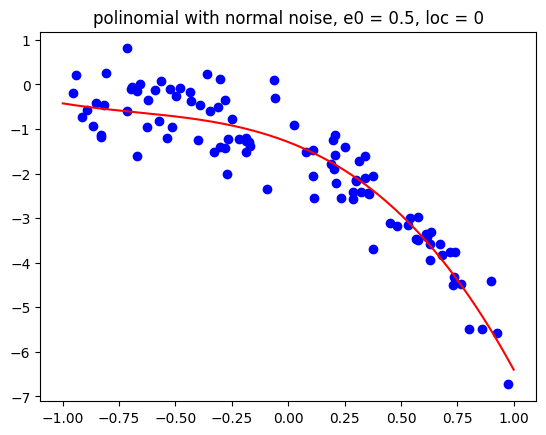

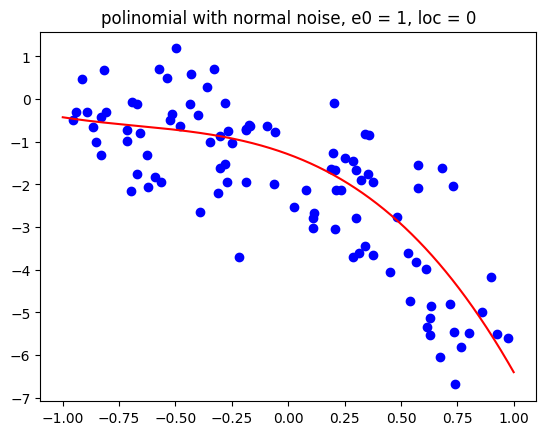

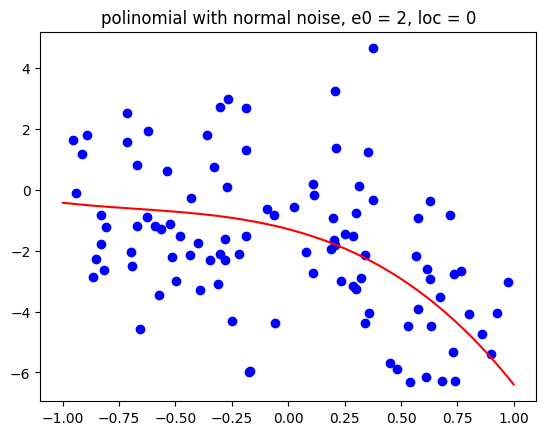

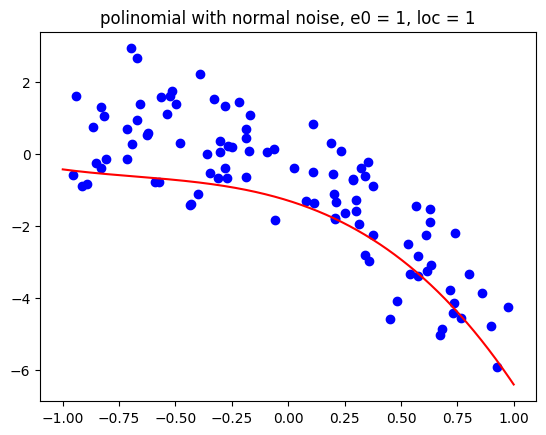

In [5]:
def draw_polinomial_normal_noise(e0, loc):
    e_norm = np.random.normal(loc=loc, scale=e0, size=N)
    polinom_norm = a * x**3 + b * x**2 + c * x + d + e_norm
    plt.scatter(x, polinom_norm, color="blue")

    plt.plot(xx, f_polinom, color="red")
    plt.title(f'polinomial with normal noise, e0 = {e0}, loc = {loc}')
    plt.show()
    
draw_polinomial_normal_noise(0.5, 0)
draw_polinomial_normal_noise(1, 0)
draw_polinomial_normal_noise(2, 0)
draw_polinomial_normal_noise(1, 1)

In [6]:
xx = np.linspace(-1, 1, 1000)
f_sin = xx * np.sin(2 * math.pi * xx)

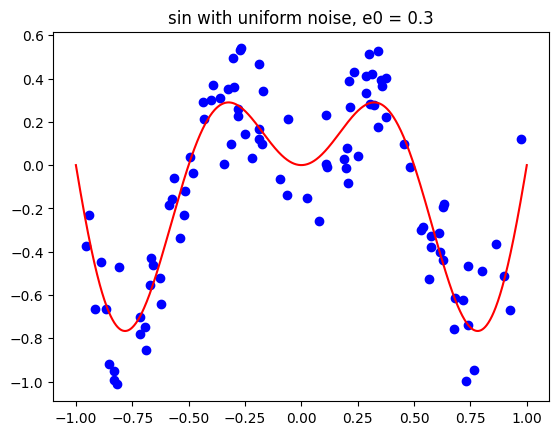

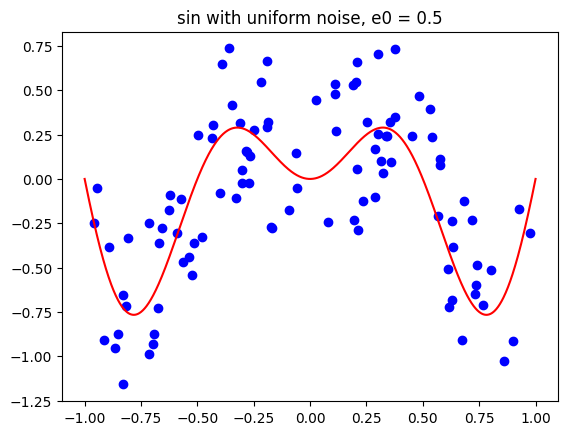

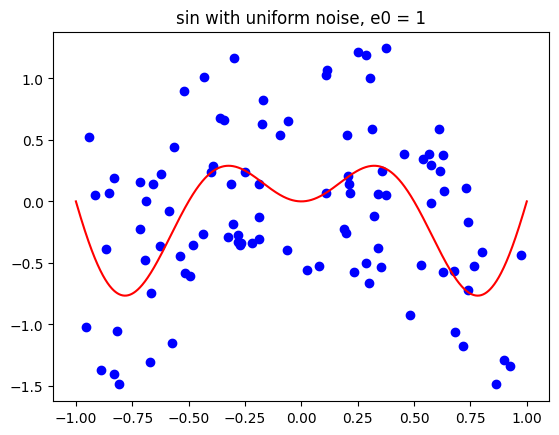

In [7]:
def draw_sin_uniform_noise(e0):
    e_unif = np.random.uniform(-e0, e0, N)
    sin_unif = x * np.sin(2 * math.pi * x) + e_unif
    plt.scatter(x, sin_unif, color="blue")

    plt.plot(xx, f_sin, color="red")
    plt.title(f'sin with uniform noise, e0 = {e0}')
    plt.show()
    
draw_sin_uniform_noise(0.3)
draw_sin_uniform_noise(0.5)
draw_sin_uniform_noise(1)

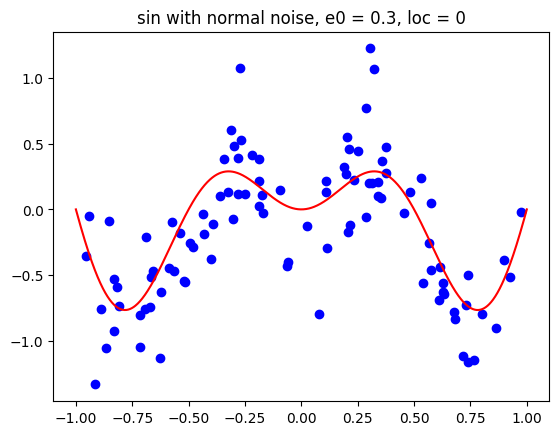

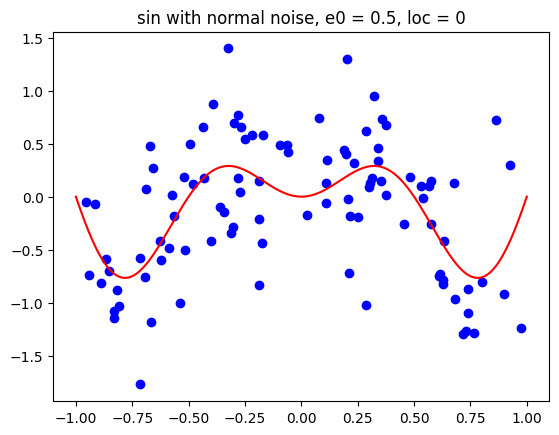

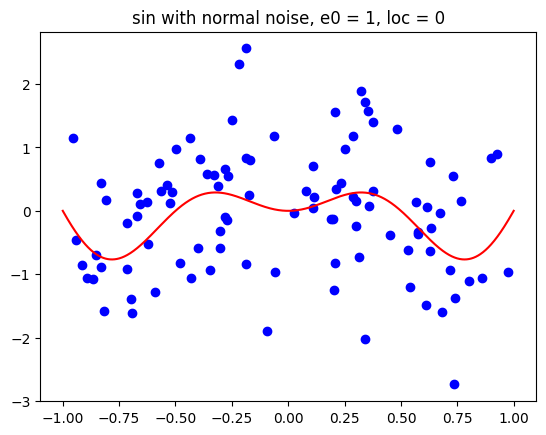

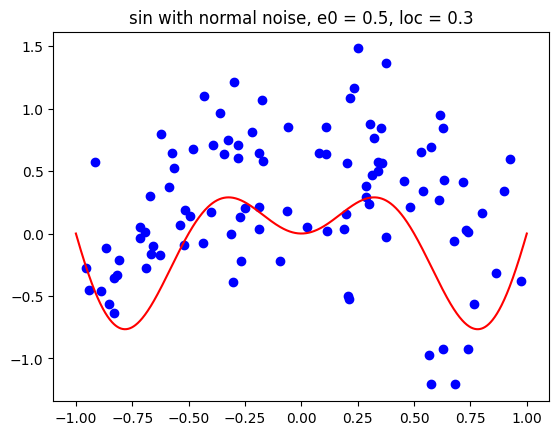

In [8]:
def draw_sin_normal_noise(e0, loc):
    e_norm = np.random.normal(loc=loc, scale=e0, size=N)
    sin_norm = x * np.sin(2 * math.pi * x) + e_norm
    plt.scatter(x, sin_norm, color="blue")

    plt.plot(xx, f_sin, color="red")
    plt.title(f'sin with normal noise, e0 = {e0}, loc = {loc}')
    plt.show()
    
draw_sin_normal_noise(0.3, 0)
draw_sin_normal_noise(0.5, 0)
draw_sin_normal_noise(1, 0)
draw_sin_normal_noise(0.5, 0.3)

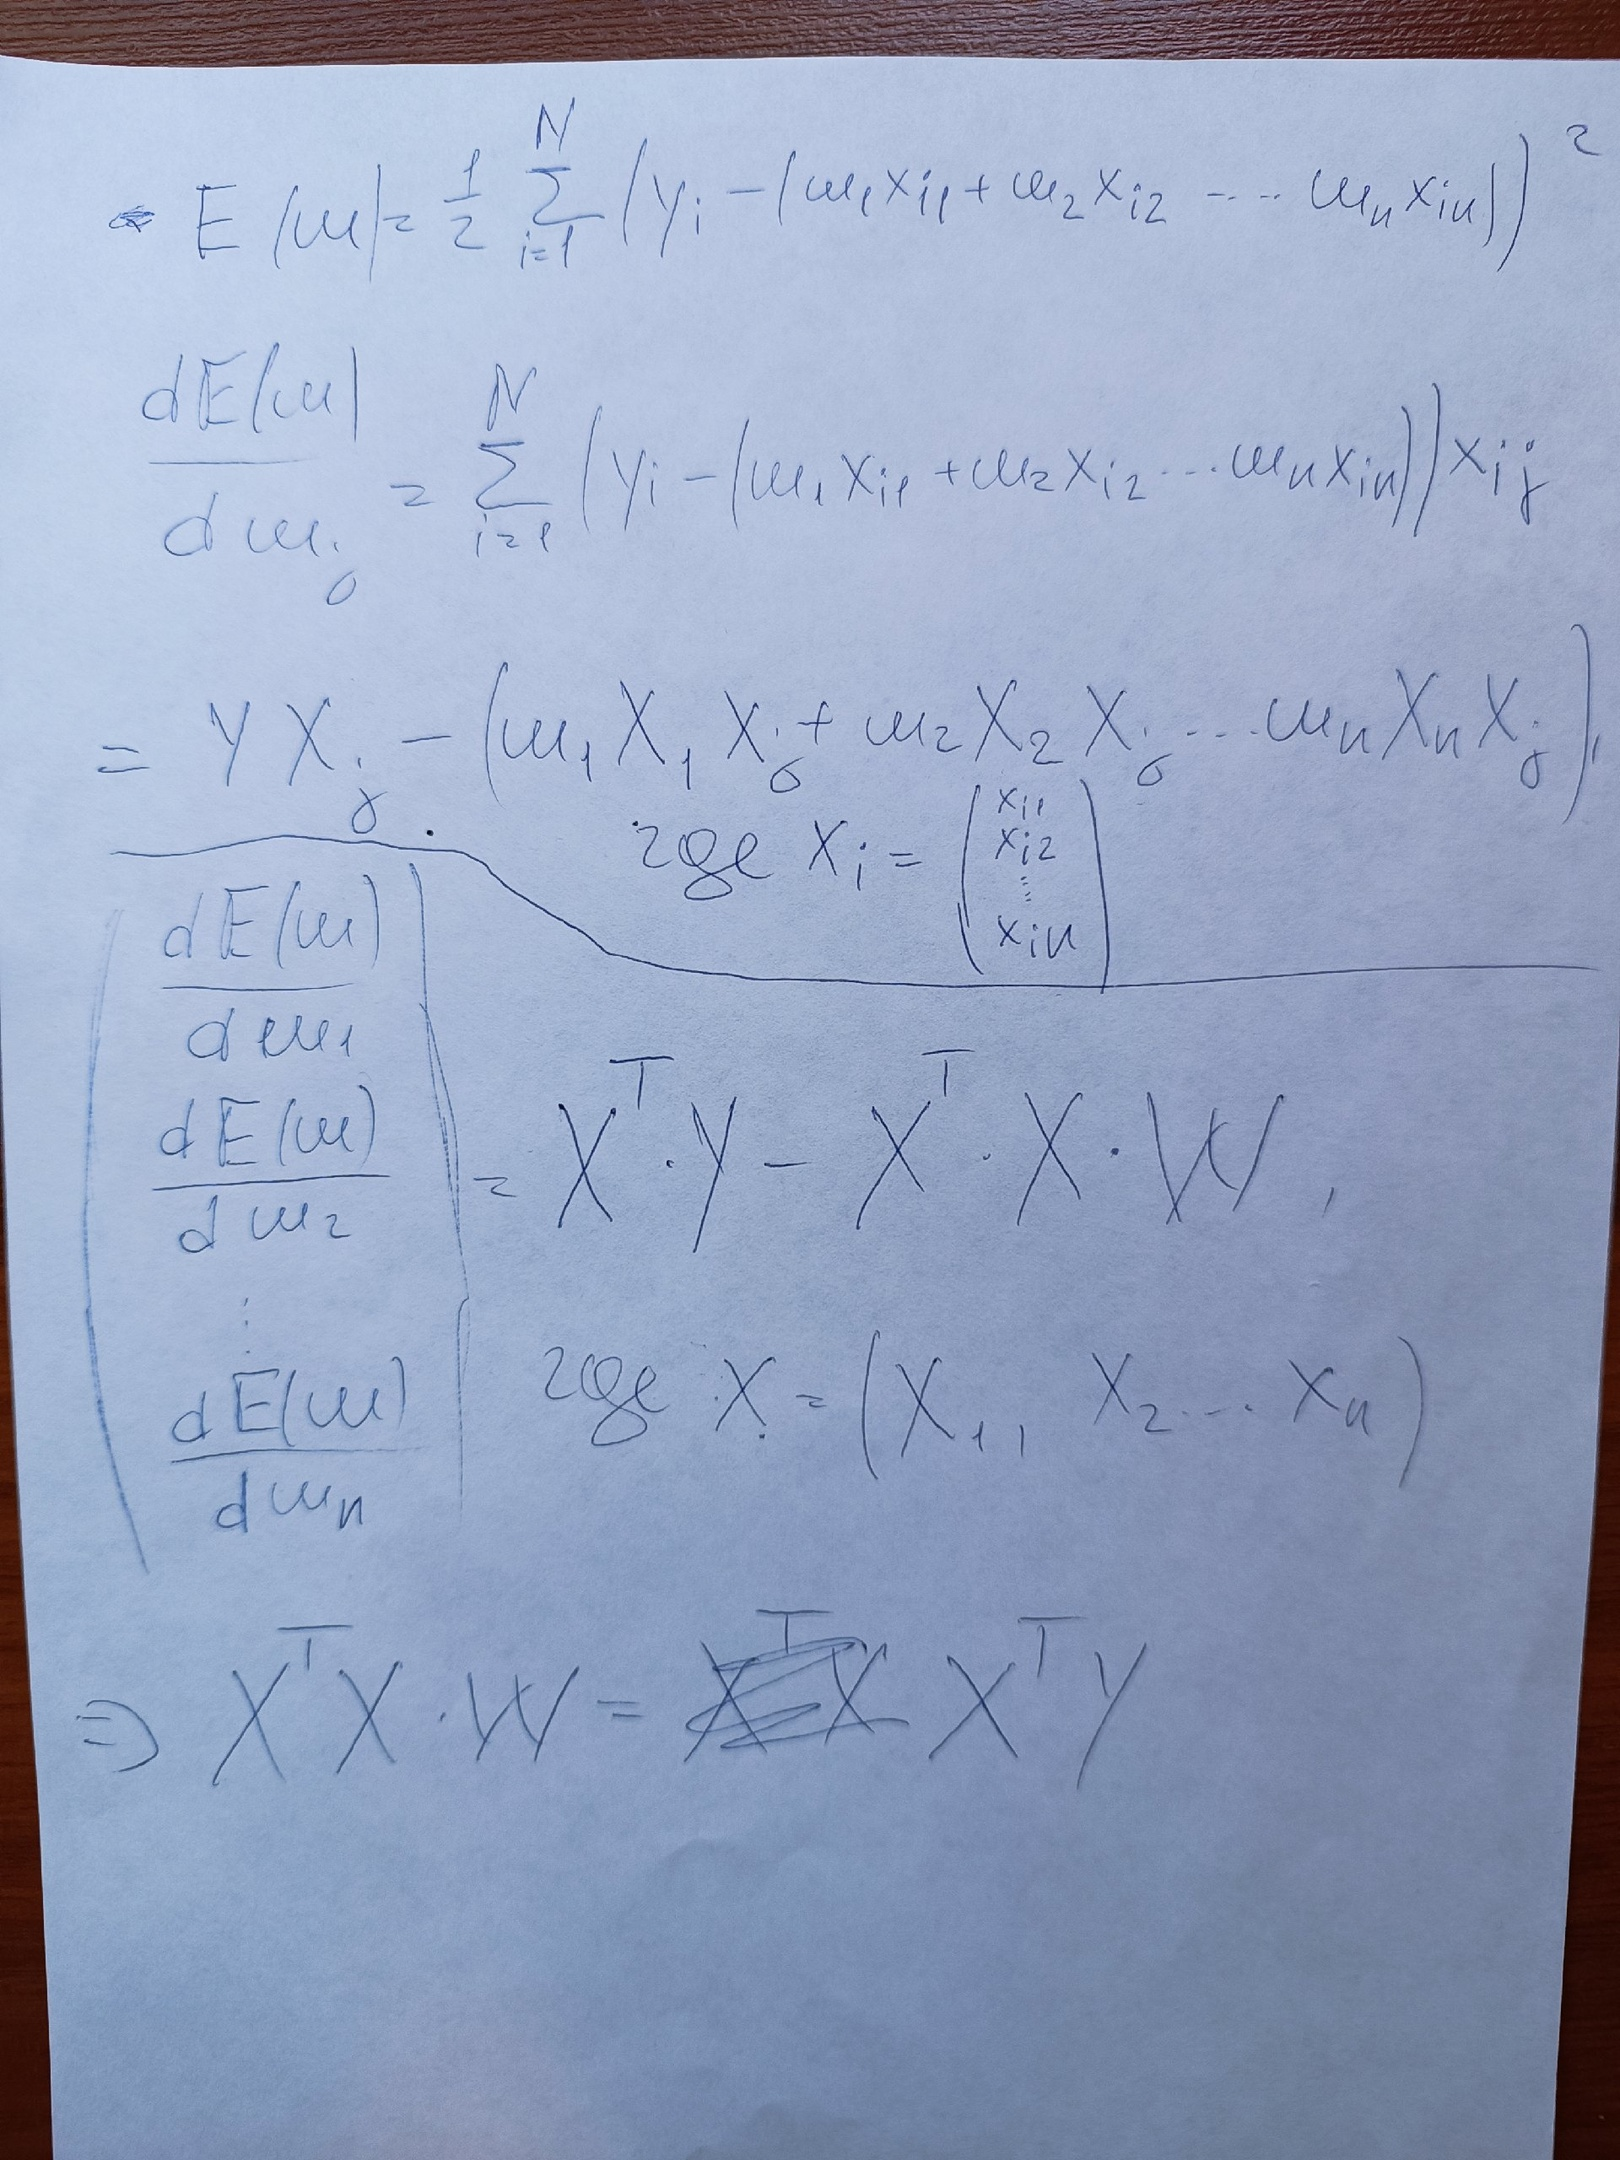

In [9]:
def make_dataset_matr(M, x):
    X = np.ones((x.shape[0], M + 1))
    for i in range(1, M + 1):
        X[:, i] = x**i
    return X

def fit(x, y, M):
    X = make_dataset_matr(M, x)
    return np.linalg.solve(X.T.dot(X), X.T.dot(y))

def predict(x):
    global w
    xx = make_dataset_matr(len(w)-1, x)
    return xx.dot(w)
    

In [10]:
x_polinom = np.linspace(-1, 1, 1000)
a, b, c, d = np.random.uniform(low=-3, high=3, size=4)
y_polinom = a * x_polinom**3 + b * x_polinom**2 + c * x_polinom + d

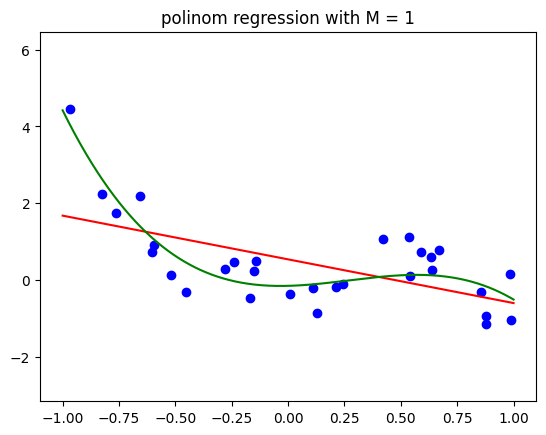

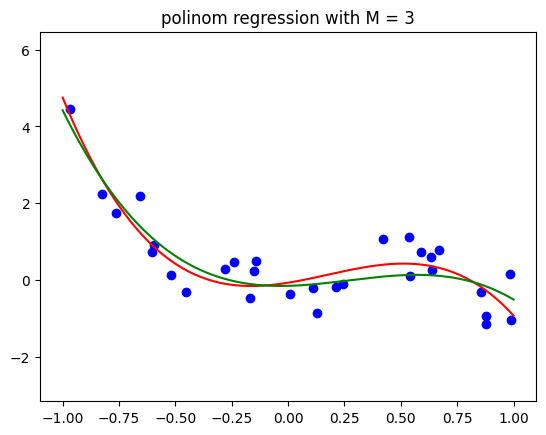

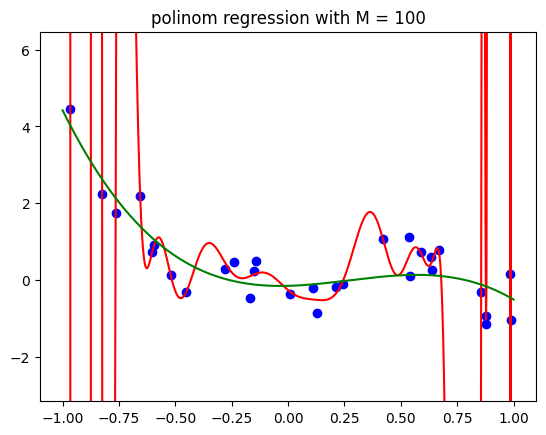

In [11]:
N = 30
x = np.random.uniform(low=-1, high=1, size=N)
y = a * x**3 + b * x**2 + c * x + d + np.random.normal(0, 0.5, N)

def draw_polinom_regression(M):
    global w
    w = fit(x, y, M)
    xx = np.linspace(-1, 1, 1000)
    
    plt.plot(xx, predict(xx), color="red")
    plt.scatter(x, y, color="blue")
    plt.plot(x_polinom, y_polinom, color="green")
    
    plt.ylim(y.min() - 2, y.max() + 2)
    plt.title(f'polinom regression with M = {M}')
    plt.show()
    
draw_polinom_regression(1)
draw_polinom_regression(3)
draw_polinom_regression(100)

In [51]:
x_sin = np.linspace(0.01, 0.2, 1000)
y_sin = np.sin(x_sin ** (-1))

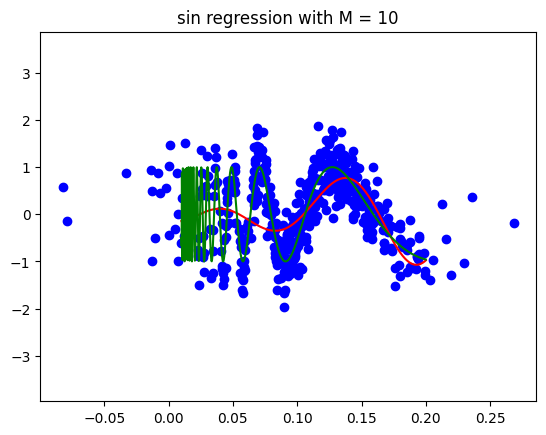

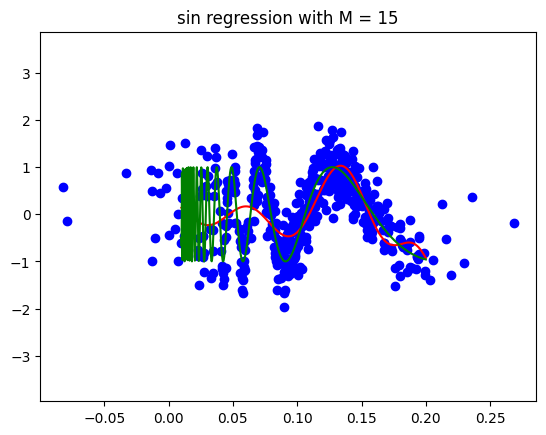

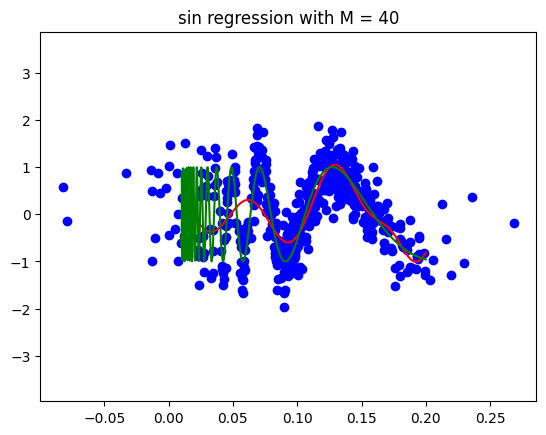

In [55]:
N = 500
x = np.random.normal(0.1, 0.05, size=N)
y = np.sin(x ** (-1)) + np.random.normal(0, 0.4, N)

def draw_sin_regression(M):
    global w
    w = fit(x, y, M)
    xx = np.linspace(0.01, 0.2, 1000)
    plt.plot(xx, predict(xx), color="red")
    
    plt.scatter(x, y, color="blue")
    plt.plot(x_sin, y_sin, color="green")
    
    plt.ylim(y.min() - 2, y.max() + 2)
    plt.title(f'sin regression with M = {M}')
    plt.show()
    
draw_sin_regression(10)
draw_sin_regression(15)
draw_sin_regression(40)